# PROJECT: Meachining learning 

# Problem Statment :Create a Machine Learning model using various Classification.

# Import the important libraries

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Load data from csv file

In [17]:
df = pd.read_csv("C:\\Program Files\\python\\sydney_rain prediction.csv", header=0)


In [19]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [21]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [27]:
print(df.shape)

(3337, 17)


In [29]:
from sklearn import tree

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Date               3337 non-null   object  
 1   Location           3337 non-null   object  
 2   MinTemp            3334 non-null   float64 
 3   MaxTemp            3335 non-null   float64 
 4   Rainfall           3331 non-null   float64 
 5   Evaporation        3286 non-null   float64 
 6   Sunshine           3321 non-null   float64 
 7   Humidity9am        3323 non-null   float64 
 8   Humidity3pm        3324 non-null   float64 
 9   Pressure9am        3317 non-null   float64 
 10  Pressure3pm        3318 non-null   float64 
 11  Temp9am            3333 non-null   float64 
 12  Temp3pm            3333 non-null   float64 
 13  RainToday          3337 non-null   int32   
 14  RainTomorrow       3337 non-null   int32   
 15  Cloud9am_Category  3186 non-null   category
 16  Cloud3

# Data visualisation

<Axes: xlabel='RainToday', ylabel='RainTomorrow'>

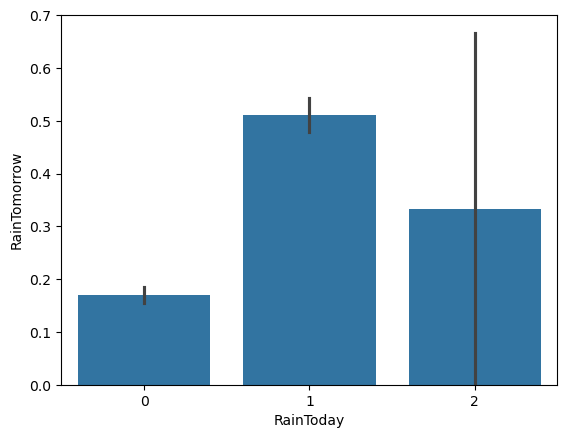

In [171]:
sns.barplot(data=df, x= 'RainToday',  y='RainTomorrow')

<Axes: xlabel='MinTemp', ylabel='RainTomorrow'>

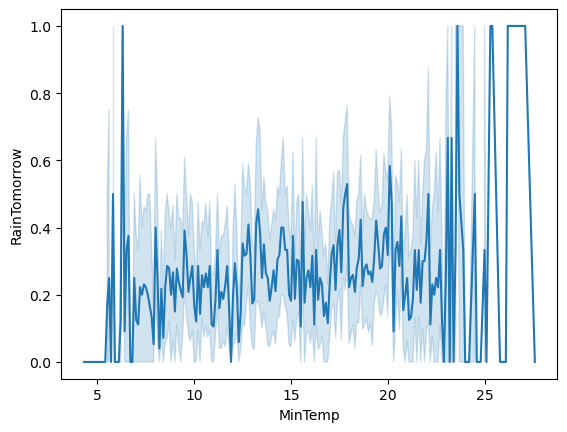

In [182]:
sns.lineplot(data=df, x= 'MinTemp', y='RainTomorrow')

# Cor-relationship variable

In [158]:
df.corr

<bound method DataFrame.corr of             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     01-02-2008   Sydney     19.5     22.4      15.6          6.2       0.0   
1     02-02-2008   Sydney     19.5     25.6       6.0          3.4       2.7   
2     03-02-2008   Sydney     21.6     24.5       6.6          2.4       0.1   
3     04-02-2008   Sydney     20.2     22.8      18.8          2.2       0.0   
4     05-02-2008   Sydney     19.7     25.7      77.4          NaN       0.0   
...          ...      ...      ...      ...       ...          ...       ...   
3332  21-06-2017   Sydney      8.6     19.6       0.0          2.0       7.8   
3333  22-06-2017   Sydney      9.3     19.2       0.0          2.0       9.2   
3334  23-06-2017   Sydney      9.4     17.7       0.0          2.4       2.7   
3335  24-06-2017   Sydney     10.1     19.3       0.0          1.4       9.3   
3336  25-06-2017   Sydney      7.6     19.3       0.0          3.4       9.4   

      H

# find the missing value

In [37]:
mean_values = df[['Cloud9am', 'Cloud3pm']].mean()
print(mean_values)

Cloud9am    4.181523
Cloud3pm    4.218660
dtype: float64


In [39]:
df['Cloud9am'].fillna(df['Cloud3pm'].mean(), inplace=True)


C:\Users\Window 10\AppData\Local\Temp\ipykernel_10316\2460364000.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cloud9am'].fillna(df['Cloud3pm'].mean(), inplace=True)


# Data processing

In [41]:
from sklearn.preprocessing import LabelEncoder

In [43]:
label_encoder = LabelEncoder()
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])


bins = [0, 2, 5, 8, 10]
labels = ['Very Low', 'Low', 'Medium', 'High']
df['Cloud9am_Category'] = pd.cut(df['Cloud9am'], bins=bins, labels=labels)


In [47]:
df['Cloud3pm_Category'] = pd.qcut(df['Cloud3pm'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


In [49]:
df.drop(columns=['Cloud9am', 'Cloud3pm'], inplace=True)


# Create dependent variable and in-dependent variable

In [51]:
X = df.drop(columns=['RainTomorrow', 'Date', 'Location', 'Cloud9am_Category', 'Cloud3pm_Category'])
y = df['RainTomorrow']


In [55]:
numerical_columns = df

# Test_train_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1. Decisiontreeclassifier model

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [65]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# predicted the variable

In [79]:
y_train_pred = classifier.predict(X_train)
y_test_pred= classifier.predict(X_test)

In [81]:
y_test_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Check the accuracy of model 

In [71]:
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y_train,y_train_pred)

array([[1983,    5],
       [   4,  677]], dtype=int64)

In [85]:
confusion_matrix(y_test,y_test_pred)

array([[411,  73],
       [ 73, 111]], dtype=int64)

In [87]:
accuracy_score(y_test,y_test_pred)

0.781437125748503

# 2.Bagging model

In [104]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [112]:
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50 ,random_state=42)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [114]:
y_pred = bagging_clf.predict(X_test)


In [190]:
y_train_pred = bagging_clf.predict(X_train)

In [116]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


In [118]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[444  40]
 [ 78 106]]


In [196]:
conf_matrix = confusion_matrix(y_train, y_train_pred)


In [198]:
print(conf_matrix)

[[1988    0]
 [   1  680]]


# Random forest model

In [123]:
from sklearn.ensemble import RandomForestClassifier


In [127]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)


In [129]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [133]:
y_pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [135]:
print(cm)

[[443  41]
 [ 80 104]]


In [137]:
accuracy_score(y_test,y_pred)

0.8188622754491018

# Question;


# 1. Your views about the problem statement?


The problem statement involves predicting the Rain Tomorrow on sydene .In data several features include like Date,Location,MinTemp.,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity3pm
Pressure9am,RainToday,RainTomorrow...etc. the rain perdication show the humidity of day . so we use different type of model to perdict the variable


# 2.What will be your approach to solving this task?¶

To solve the task i read the given task carefully . In the given task provide the three csv file (Sydene rain perdiction). frist i import the all important libraries like pandas ,sesborn , mataplot.lib ,sklearn ...etc. with the help of these libraries it is easy to perform the task . After this import all the csv file with help of pandas library . Futher step includes data converting into numerical columns, preprocessing, exploratory data analysis, model training, evaluation, and accuracy, confusion matrix and different model like decision tree classification, random forest etc.

# 3. What were the available ML model options you had to perform this task?

1.Decision tree classification model 2. randomforest model ,3.Bagging model

# 4. Which model’s performance is best and what could be the possible reason for that?¶

I found the best model to perform the task is Bagging classifier model.I used other model to perform the task but the accuracy is low but in Bagging classifier the accuray is 82%. this the reason to select this model to perform the task. The biggest advantage of this model is it Bagging reduces variance and helps prevent overfitting, which is particularly beneficial for high-variance models like decision trees.

# 5. What steps can you take to improve this selected model’s performance even further?

Improving the performance of a bagging model involves several strategies, ranging from tuning hyperparameters to refining data processing,enesmeble method, model performance. we have to use above  these strategies .

# Thank you